### Food Delivery Time Prediction using Decision Tree Regressor Model

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('/Users/simarmalhan/Downloads/Delivery time/deliverytime.txt')

In [3]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


### Checking for null values

In [5]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

### Calculating the distance between the restaurant and delivery point

In [7]:
# setting the earth's radius (in km)
R = 6371

# convert degrees to radians
def degtorad(degrees):
    return degrees * (np.pi/180)

# function to calculate the distance between 2 points using the haversine formula

def distcalculate (lat1, lon1, lat2, lon2):
    d_lat = degtorad(lat2 - lat1)
    d_lon = degtorad(lon2 - lon1)
    a = np.sin(d_lat/2)**2 + np.cos(degtorad(lat1)) * np.cos(degtorad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# calculate the distance between each pair of points
data['distance'] = np.nan

for i in range(len(data)):
    data.loc[i, 'distance'] = distcalculate(data.loc[i, 'Restaurant_latitude'], 
                                        data.loc[i, 'Restaurant_longitude'], 
                                        data.loc[i, 'Delivery_location_latitude'], 
                                        data.loc[i, 'Delivery_location_longitude'])

In [8]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


### Data Exploration

Text(0, 0.5, 'Time Taken')

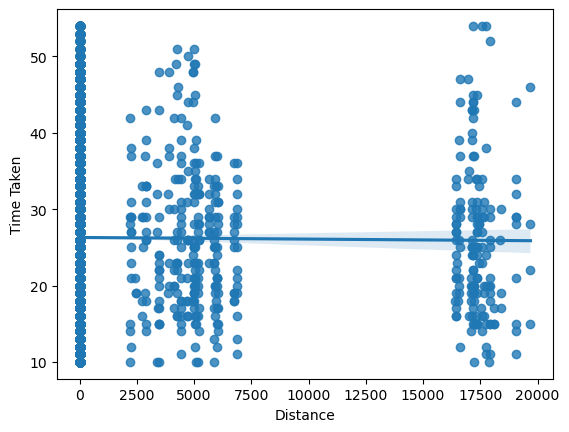

In [20]:
# relationship between distance and time taken

sns.regplot(data = data, x = 'distance', y = 'Time_taken(min)')
plt.xlabel('Distance')
plt.ylabel('Time Taken')

There is a consistent relationship between the time taken and the distance travelled to deliver the food. This means that most delivery partners deliver food within 25-30 minutes, regardless of the distance.

Text(0, 0.5, 'Time Taken')

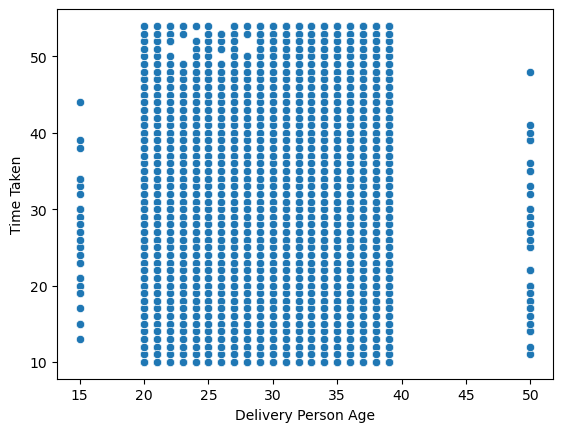

In [19]:
# Relationship between the age of the delivery partner and tume taken to deliver the food

sns.scatterplot(data, x = 'Delivery_person_Age', y = 'Time_taken(min)')
plt.xlabel('Delivery Person Age')
plt.ylabel('Time Taken')

Text(0, 0.5, 'Time Taken')

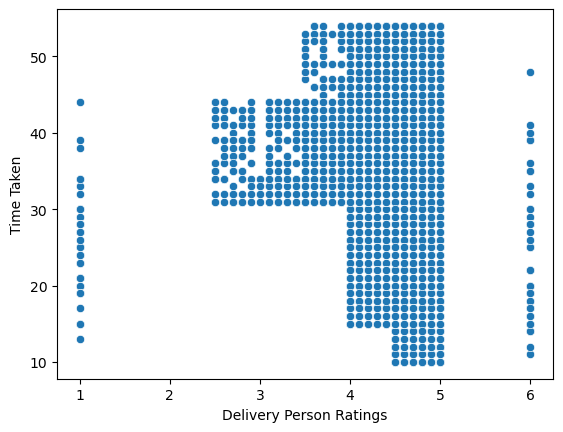

In [18]:
# Relationship between time taken and the rating

sns.scatterplot(data, x = 'Delivery_person_Ratings', y = 'Time_taken(min)')
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Time Taken')

Text(0, 0.5, 'Time Taken')

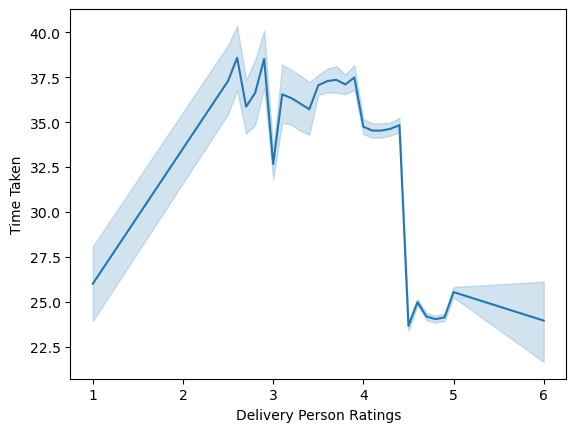

In [21]:
sns.lineplot(data = data, x = 'Delivery_person_Ratings', y = 'Time_taken(min)')
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Time Taken')

There is an inverse linear relationship between the time taken to deliver the food and the ratings of the delivery partner. It means delivery partners with higher ratings take less time to deliver the food compared to partners with low ratings.

*So, the features that contribute the most to the food delivery time based on our analysis are:*
- age of the driver partner
- their ratings
- distance between the restaurant and delivery location

### Food delivery time prediction model

In [23]:
from sklearn.model_selection import train_test_split

X = data[['Delivery_person_Age', 'Delivery_person_Ratings', 'distance']]
y = data['Time_taken(min)']

In [25]:
# scaling the columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Using Linear Regression

In [26]:
# model selection

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 71.92875898646545
R-squared: 0.17962719475949174


### Using Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_scaled, y)

DecisionTreeRegressor()

In [34]:
y_pred = model.predict(X_scaled)

In [35]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 11.377927953270756


In [36]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.8707844887349009


### Checking the performance using new data

In [37]:
import numpy as np

# Input feature prompt
print("Food Delivery Time Prediction")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = float(input("Total Distance (in km): "))

# Prepare the input features
features = np.array([[a, b, c]])

# Predict delivery time
predicted_time = model.predict(features)

# Output the result
print("Predicted Delivery Time in Minutes = ", predicted_time[0])

Food Delivery Time Prediction
Age of Delivery Partner: 25
Ratings of Previous Deliveries: 4.5
Total Distance (in km): 5
Predicted Delivery Time in Minutes =  29.0
